In [377]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Indizes

In [378]:
# ind_gb     = ['^FTSE']
ind_german   = ['^GDAXI', '^MDAXI','^SDAXI']
ind_euro     = ['^STOXX50E']
ind_usa      = ['^DJI','^GSPC','^IXIC']        # DowJones, S&P 500, NASDAQ
ind_russland = ['IMOEX.ME', 'RTSI.ME']         # MOEX Russia Index, RTS Index
ind_japan  =   ['^N225']
ind_hong   =   ['^HSI']

vix = '^VIX'
msci = 'MSCI'

all_indizes = ind_german + ind_euro + ind_usa + ind_japan + ind_hong
all_labels  = ['DAX', 'MDAX', 'SDAX', 'STOXX50E', 'DowJones', 'SP500', 'NASDAQ', 'Nikkei225', 'HANGSENG']

imp_indizes = ['^GDAXI','^DJI','^N225',vix,msci]
imp_labels  = ['DAX','DowJones','Nikkei225','Vix','MSCI']

In [379]:
def read_and_merge(wkns:[]=None,names:[]=None,start=None,stop=None):
    import yfinance as yf
    df_list = []
    for wkn in wkns:
        stock = yf.Ticker(wkn)
        df = stock.history(start=start, end=stop)
        df_list.append(df)
    stocks = pd.concat(df_list, axis=1,keys=names)
    stocks.columns.names = ['Stock Ticker','Stock Info']
    return stocks


indizes_df = read_and_merge(all_indizes,all_labels,start="1980-01-01",stop="2021-10-01")
indizes_df

Stock Ticker           DAX                                            \
Stock Info            Open          High           Low         Close   
Date                                                                   
1979-12-31             NaN           NaN           NaN           NaN   
1980-01-02             NaN           NaN           NaN           NaN   
1980-01-03             NaN           NaN           NaN           NaN   
1980-01-04             NaN           NaN           NaN           NaN   
1980-01-07             NaN           NaN           NaN           NaN   
...                    ...           ...           ...           ...   
2021-09-24    15562.139648  15573.459961  15497.169922  15531.750000   
2021-09-27    15699.009766  15704.049805  15552.089844  15573.879883   
2021-09-28    15542.030273  15542.410156  15232.969727  15248.559570   
2021-09-29    15357.000000  15422.750000  15301.349609  15365.269531   
2021-09-30    15434.330078  15448.519531  15246.000000  15260.690430   

Stock Ticker                                             MDAX                \
Stock Info        Volume Dividends Stock Splits          Open          High   
Date                                                                          
1979-12-31           NaN       NaN          NaN           NaN           NaN   
1980-01-02           NaN       NaN          NaN           NaN           NaN   
1980-01-03           NaN       NaN          NaN           NaN           NaN   
1980-01-04           NaN       NaN          NaN           NaN           NaN   
1980-01-07           NaN       NaN          NaN           NaN           NaN   
...                  ...       ...          ...           ...           ...   
2021-09-24    49967000.0       0.0          0.0  35434.011719  35434.011719   
2021-09-27    59034800.0       0.0          0.0  35465.089844  35654.238281   
2021-09-28    75174800.0       0.0          0.0  35210.281250  35210.281250   
2021-09-29    56303700.0       0.0          0.0  34650.078125  34940.890625   
2021-09-30    74664500.0       0.0          0.0  34661.000000  34828.171875   

Stock Ticker                ...   Nikkei225                         \
Stock Info             Low  ...      Volume Dividends Stock Splits   
Date                        ...                                      
1979-12-31             NaN  ...         NaN       NaN          NaN   
1980-01-02             NaN  ...         NaN       NaN          NaN   
1980-01-03             NaN  ...         NaN       NaN          NaN   
1980-01-04             NaN  ...         0.0       0.0          0.0   
1980-01-07             NaN  ...         0.0       0.0          0.0   
...                    ...  ...         ...       ...          ...   
2021-09-24    35217.199219  ...  84600000.0       0.0          0.0   
2021-09-27    35274.140625  ...  74600000.0       0.0          0.0   
2021-09-28    34445.859375  ...  89800000.0       0.0          0.0   
2021-09-29    34520.480469  ...  94700000.0       0.0          0.0   
2021-09-30    34338.960938  ...  99000000.0       0.0          0.0   

Stock Ticker      HANGSENG                                            \
Stock Info            Open          High           Low         Close   
Date                                                                   
1979-12-31             NaN           NaN           NaN           NaN   
1980-01-02             NaN           NaN           NaN           NaN   
1980-01-03             NaN           NaN           NaN           NaN   
1980-01-04             NaN           NaN           NaN           NaN   
1980-01-07             NaN           NaN           NaN           NaN   
...                    ...           ...           ...           ...   
2021-09-24    24487.240234  24636.640625  24095.789062  24192.160156   
2021-09-27    24131.419922  24509.000000  24131.419922  24208.779297   
2021-09-28    24323.000000  24679.460938  24232.980469  24500.390625   
2021-09-29    24276.710938  24694.46093

In [380]:
def read_stocks(wkns:[]=None, names:[]=None, start_input=None,end_input=None):
    """ Diese Funktion läd Aktienkurse aus der yahoo-finanze Datenbank.
    :param wkns:  Liste aller wkn's
    :param names: Liste aller zugehörigen Aktiennamen
    :return:      Ausgabe der Aktiennamen als Dataframe
    """
    for name, wkn in zip(names,wkns):
        exec("{} = web.DataReader(wkn, data_source='yahoo', start = start_input, end = end_input)".format(name))

    print(names)

def merge_stocks(df_names:[]=None,names:[]=None):
    stocks = pd.concat(df_names, axis=1,keys=names)
    stocks.columns.names = ['Stock Ticker','Stock Info']
    return stocks

#read_stocks(wkns=imp_indizes, names=imp_labels,start_input=start,end_input=end)
#indizes = merge_stocks(df_names=[DAX, DowJones, Nikkei225],names= imp_labels)

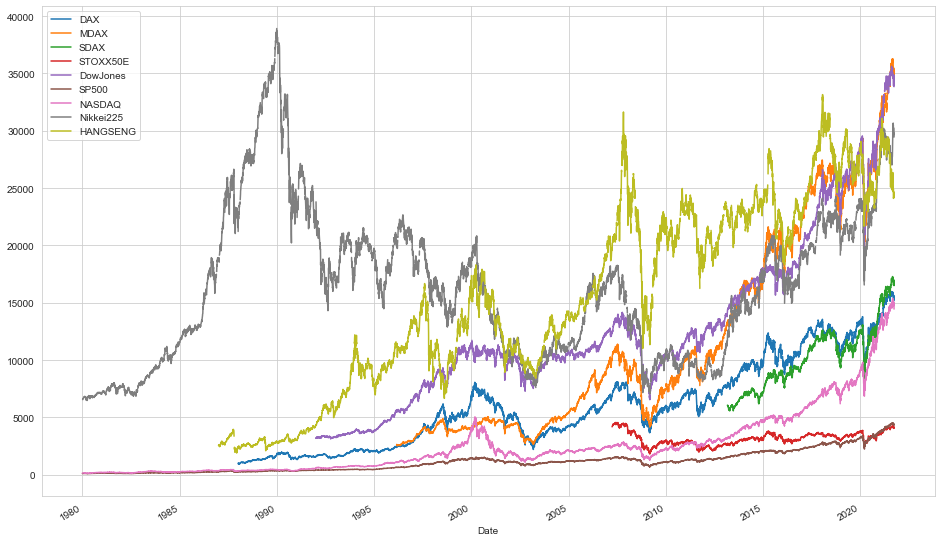

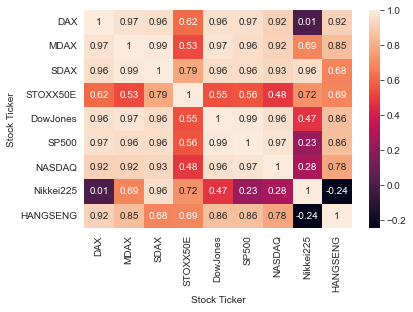

In [381]:
def plot_stocks(df_stock:[]=None,names:[]= None):
    sns.set_style('whitegrid')
    import cufflinks as cf
    cf.go_offline()

    for name in names:
        df_stock[name]['Close'].plot(figsize=(16,10),label=name)


    df_stock.xs(key='Close',axis=1,level='Stock Info').iplot()
    plt.grid(True)
    plt.legend()
    plt.show()
    sns.heatmap(df_stock.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

plot_stocks(df_stock=indizes_df,names=all_labels)

In [382]:
for name in ['Vix','MSCI']:
    indizes_df[name]['Close'].plot(figsize=(16,10),label=name)

plt.grid(True)
plt.legend()
plt.show()

KeyError: 'Vix'